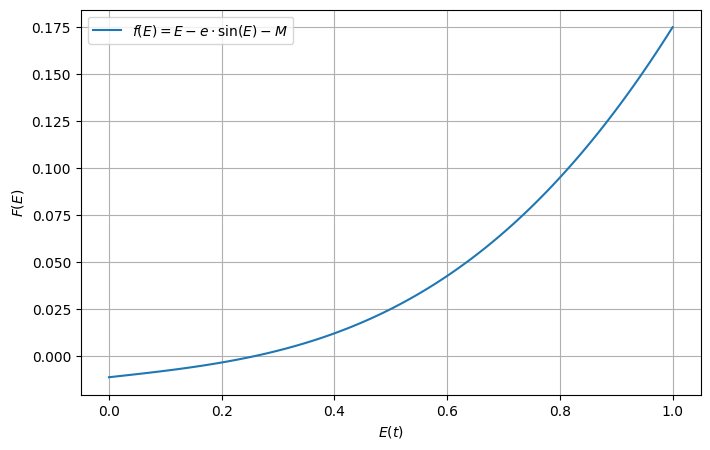

In [53]:
import matplotlib.pyplot as plt
import numpy as np

e=0.9672671
T=75.96000
t0=1986.1113
t_abril=1986.1113 + 50/365
def M(t):
  return (2*np.pi*(t-t0))/T
M=M(t_abril)
E=np.linspace(0,1,100)
f_E = E - e*np.sin(E)- M

plt.figure(figsize=(8,5))
plt.grid(True)
plt.plot(E,f_E,label=r'$f(E) = E - e\cdot\sin(E) - M$')
plt.xlabel('$E(t)$')
plt.ylabel('$F(E)$')
plt.legend()
plt.show()

In [54]:

e=0.9672671
T=75.96000
t0=1986.1113
t_abril=1986.1113 + 50/365
M=(2*np.pi*(t_abril-t0))/T

def Newton(f,df,E0,tol=1e-4,max_iter=100):
  aproximaciones=[]
  for _ in range(max_iter):
    f_E0=f(E0)
    df_E0=df(E0)

    if df_E0 == 0:
        raise ValueError('La derivada es 0, no es posible seguir con el metodo')

    E1=E0-f_E0/df_E0
    aproximaciones.append(E1)

    if abs(E1-E0)<tol:
      return E1, aproximaciones
    E0=E1
  raise RuntimeError('No llego a la raiz en el numero de iterasiones')
f = lambda E: E - e*np.sin(E)-M
df = lambda E: 1 - e*np.cos(E)
E0=0.3
raiz, aproximaciones= Newton(f,df,E0)
print(f'La raiz es, {raiz}, y el numero de iteraciones fue, {len(aproximaciones)}')



La raiz es, 0.2599487923998397, y el numero de iteraciones fue, 3


In [56]:
def Secante(f,E0,E1,tol=1e-4,max_iter=100):
  aproximaciones=[E0,E1]
  for _ in range(max_iter):
    f_E0=f(E0)
    f_E1=f(E1)

    if (f_E1-f_E0) == 0:
        raise ValueError('La derivada es 0, no es posible seguir con el metodo')

    E2=E1-f_E1*(E1-E0)/(f_E1-f_E0)
    aproximaciones.append(E2)

    if abs(E2-E1)<tol:
      return E2, aproximaciones
    E0=E1
    E1=E2
  return RuntimeError('No fue suficiente')
f = lambda E: E - e*np.sin(E)-M
raiz, aproximaciones = Secante(f, 1, 3)
print(f'La raiz sera {raiz} en el numero de iteraciones {len(aproximaciones)}')

La raiz sera 0.259948838824295 en el numero de iteraciones 11


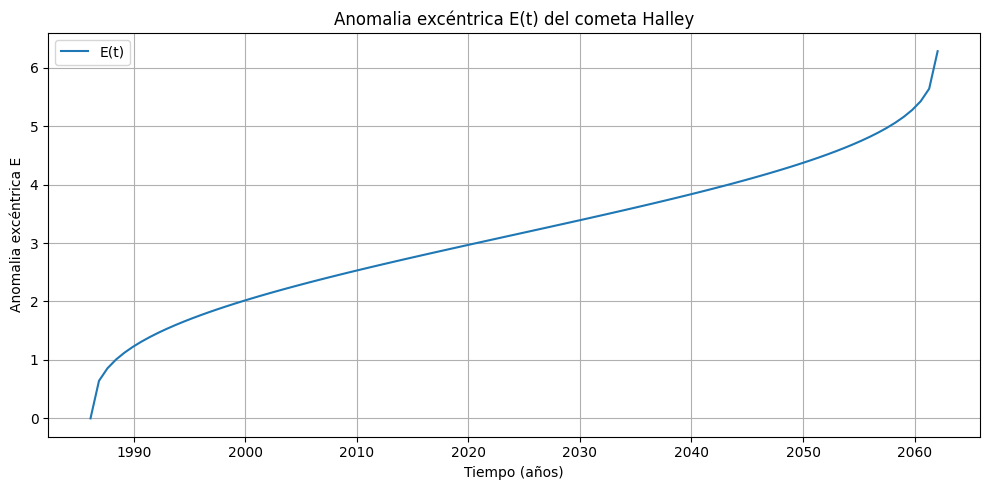

In [58]:
import numpy as np
import matplotlib.pyplot as plt

e = 0.9672671
T = 75.96
t0 = 1986.1113
N = 100
dt = T / N


def Newton(f, df, x0, tol=1e-10, max_iter=100):
    x = x0
    for i in range(max_iter):
        dx = -f(x) / df(x)
        x += dx
        if abs(dx) < tol:
            return x, i
    raise RuntimeError("No converge")

t_values = []
E_values = []

for i in range(N + 1):
    t = t0 + i * dt
    M_t = (2 * np.pi * (t - t0)) / T

    f = lambda E: E - e * np.sin(E) - M_t
    df = lambda E: 1 - e * np.cos(E)

    try:
        E0 = E_values[-1] if i > 0 else 0.0
        raiz, _ = Newton(f, df, E0)
        t_values.append(t)
        E_values.append(raiz)
    except Exception as ex:
        print(f"No convergio en t = {t:.4f}: {ex}")

plt.figure(figsize=(10, 5))
plt.plot(t_values, E_values, label='E(t)', color='tab:blue')
plt.xlabel('Tiempo (años)')
plt.ylabel('Anomalia excéntrica E')
plt.title('Anomalia excéntrica E(t) del cometa Halley')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


2.

In [ ]:
def Newton(f,df,m0=0.9,tol=1e-4,max_iter=100):
  aproximaciones=[]
  T=0.5
  for _ in range(max_iter):
    f_m0=f(m0)
    df_m0=df(m0)
    if df_m0==0:
      raise ValueError('Derivada es cero')
    m1= m0-f_m0/df_m0
    aproximaciones.append(m1)
    if abs(m1-m0)<tol:
      return m1,aproximaciones
    m0=m1
  raise RuntimeError('No hubo suficientes iteraciones')
f = lambda m: m-np.tanh(m/T)
df = lambda m: 1 - (1 / T) * (1 - np.tanh(m / T)**2)
raiz,aproximaciones=Newton(f,df,0.9)
print(f'{raiz:.4f}')

0.9575


In [ ]:
def Secante(f,m0,m1,tol=1e-4,max_iter=100):
  aproximaciones = [m0, m1]  # Lista para almacenar las aproximaciones sucesivas

  for _ in range(max_iter):
        f_m0 = f(m0)
        f_m1 = f(m1)

        # Asegurarse de que f(x1) - f(x0) no sea cero
        if f_m1 - f_m0 == 0:
            raise ValueError("f(x1) - f(x0) es cero, el método no puede continuar.")

        # Fórmula de la secante
        m2 = m1 - f_m1 * (m1 - m0) / (f_m1 - f_m0)
        aproximaciones.append(m2)  # Guardar la aproximación en la lista

        # Verificar la condición de convergencia
        if abs(m2 - m1) < tol:
            return m2, aproximaciones  # Retorna la raíz encontrada y la lista de aproximaciones

        # Actualizar los valores para la siguiente iteración
        m0 = m1
        m1 = m2

  raise RuntimeError("El método no convergió en el número máximo de iteraciones.")
f = lambda m: m-np.tanh(m/T)
raiz,aproximaciones=Secante(f,0.3,0.9)
print(f'{raiz:.4f}')

0.9575


In [ ]:
def punto_fijo(g, m0=0.9, tol=1e-4, max_iter=100):
    aproximaciones = []
    for _ in range(max_iter):
        m1 = g(m0)
        aproximaciones.append(m1)
        if abs(m1 - m0) < tol:
            return round(m1, 4), aproximaciones
        m0 = m1
    raise RuntimeError("El método no convergió en el número máximo de iteraciones.")

T = 0.5
g = lambda m: np.tanh(m / T)

raiz_pf, aproximaciones_pf = punto_fijo(g, 0.9)
print(f'Método de punto fijo: {raiz_pf:.4f}')

Método de punto fijo: 0.9575


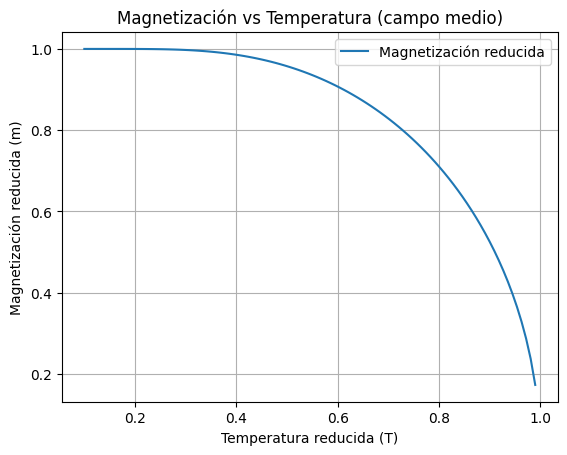

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def secante_T(f, m0, m1, tol=1e-4, max_iter=100):
    for _ in range(max_iter):
        f_m0 = f(m0)
        f_m1 = f(m1)
        if f_m1 - f_m0 == 0:
            return np.nan  # No convergió
        m2 = m1 - f_m1 * (m1 - m0) / (f_m1 - f_m0)
        if abs(m2 - m1) < tol:
            return m2
        m0, m1 = m1, m2
    return np.nan  # No convergió

T_vals = np.linspace(0.1, 0.99, 100)
m_vals = []

for T in T_vals:
    f = lambda m: m - np.tanh(m / T)
    m = secante_T(f, 0.3, 0.9)
    m_vals.append(m)

plt.plot(T_vals, m_vals, label='Magnetización reducida')
plt.xlabel('Temperatura reducida (T)')
plt.ylabel('Magnetización reducida (m)')
plt.title('Magnetización vs Temperatura (campo medio)')
plt.grid(True)
plt.legend()
plt.show()

3.

In [ ]:
import numpy as np

def Newton(f, df, T0, tol=1e-4, max_iter=100):
    aproximaciones = []
    for _ in range(max_iter):
        f_T0 = f(T0)
        df_T0 = df(T0)
        if df_T0 == 0:
            raise ValueError("Derivada es cero.")
        T2 = T0 - f_T0 / df_T0
        aproximaciones.append(T2)
        if abs(T2 - T0) < tol:
            return round(T2, 4), aproximaciones
        T0 = T2
    raise RuntimeError("No convergió")

R = 8.314
T0 = 4.444
G_target = -1e5

f = lambda T: (5/2)*R*T*np.log(T/T0) + G_target
df = lambda T: (5/2)*R*(np.log(T/T0) + 1)

raiz_newton, aprox_newton = Newton(f, df, 5)
print(f"Newton-Raphson: T = {raiz_newton:.4f} K")

Newton-Raphson: T = 904.9743 K


4.

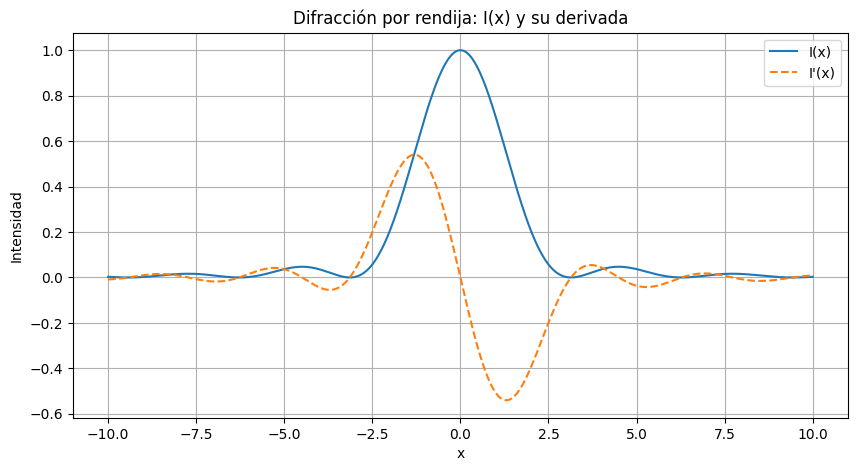

x_1/2 (I(x) = 0.5) ≈ 1.391557
Máximos locales en x ∈ [−10,10]:
x ≈ -7.725252, I(x) ≈ 0.016480
x ≈ -4.493409, I(x) ≈ 0.047190
x ≈ 4.493409, I(x) ≈ 0.047190
x ≈ 7.725252, I(x) ≈ 0.016480


<ipython-input-10-e92b2e0f025d>:8: RuntimeWarning: invalid value encountered in scalar divide
  return np.where(x == 0, 0.0, 2 * (np.sin(x)/x) * (np.cos(x) - np.sin(x)/x) / x)


In [10]:
import numpy as np
import matplotlib.pyplot as plt

def I(x):
    return np.where(x == 0, 1.0, (np.sin(x) / x) ** 2)

def dI(x):
    return np.where(x == 0, 0.0, 2 * (np.sin(x)/x) * (np.cos(x) - np.sin(x)/x) / x)

def secante(f, x0, x1, tol=1e-8, max_iter=100):
    aproximaciones = []
    for _ in range(max_iter):
        f_x0 = f(x0)
        f_x1 = f(x1)
        if f_x1 - f_x0 == 0:
            raise ValueError("Denominador 0")
        x2 = x1 - f_x1 * (x1 - x0) / (f_x1 - f_x0)
        aproximaciones.append(x2)
        if abs(x2 - x1) < tol:
            return x2, aproximaciones
        x0 = x1
        x1 = x2
    raise RuntimeError("No fueron suficientes iteraciones")

def regula_falsi(f, a, b, tol=1e-8, max_iter=100):
    fa = f(a)
    fb = f(b)
    if fa * fb > 0:
        return None
    for _ in range(max_iter):
        c = (a * fb - b * fa) / (fb - fa)
        fc = f(c)
        if abs(fc) < tol:
            return c
        if fa * fc < 0:
            b, fb = c, fc
        else:
            a, fa = c, fc
    return c

x_vals = np.linspace(-10, 10, 1000)
plt.figure(figsize=(10, 5))
plt.plot(x_vals, I(x_vals), label='I(x)')
plt.plot(x_vals, dI(x_vals), label="I'(x)", linestyle='--')
plt.title('Difracción por rendija: I(x) y su derivada')
plt.xlabel('x')
plt.ylabel('Intensidad')
plt.legend()
plt.grid()
plt.show()

f_objetivo = lambda x: I(x) - 0.5
x_mitad, aproximaciones = secante(f_objetivo, 1.0, 3.14)
print(f"x_1/2 (I(x) = 0.5) ≈ {x_mitad:.6f}")

raices = []
h = 0.5
x_intervalo = np.arange(-10, 10, h)
for i in range(len(x_intervalo) - 1):
    a, b = x_intervalo[i], x_intervalo[i+1]
    if dI(a) * dI(b) < 0:
        raiz = regula_falsi(dI, a, b)
        if raiz is not None:
            if all(abs(raiz - r) > 1e-4 for r in raices) and I(raiz) > 1e-3:
                raices.append(raiz)

raíces = sorted(raices)
print("Máximos locales en x ∈ [−10,10]:")
for r in raices:
    print(f"x ≈ {r:.6f}, I(x) ≈ {I(r):.6f}")


5.

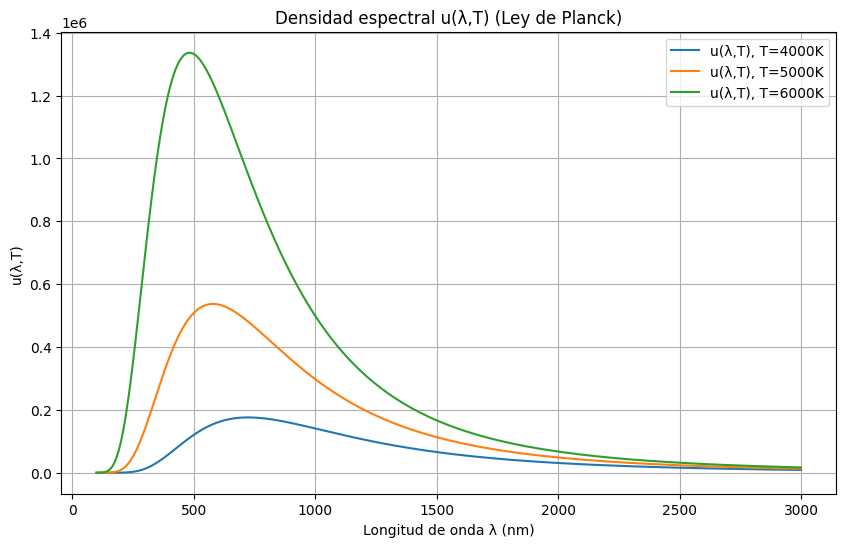

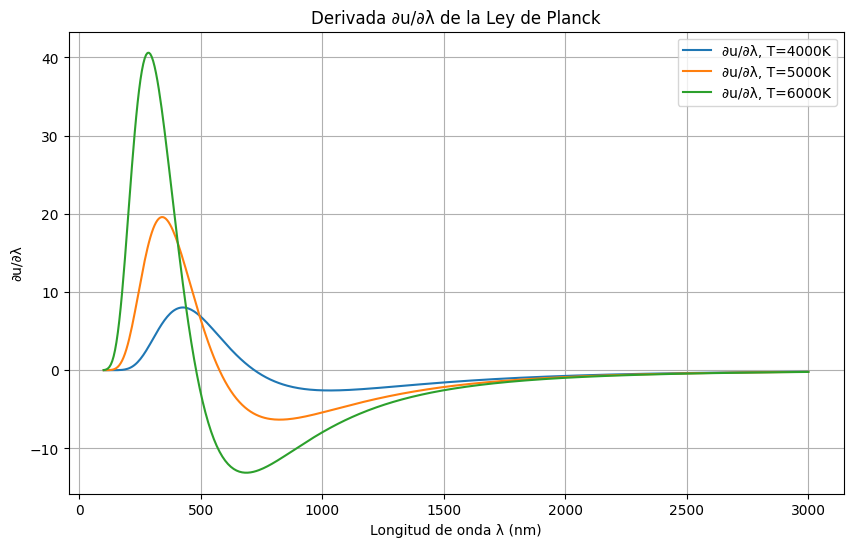

In [12]:
import numpy as np
import matplotlib.pyplot as plt

h = 6.626e-34
kB = 1.381e-23
c = 2.998e8
pi = np.pi

def u(x):
    return 1 / (x**5 * (np.exp(1/x) - 1))

def du_dx(x):
    num = x + (1 - 5*x) * np.exp(1/x)
    den = x**7 * (np.exp(1/x) - 1)**2
    return num / den

lamb = np.linspace(1e-7, 3e-6, 500)
temps = [4000, 5000, 6000]

plt.figure(figsize=(10, 6))

for T in temps:
    lambda0 = h * c / (kB * T)
    x = lamb / lambda0
    K = 8 * pi * kB * T / lambda0**4
    plt.plot(lamb * 1e9, K * u(x), label=f'u(λ,T), T={T}K')

plt.xlabel("Longitud de onda λ (nm)")
plt.ylabel("u(λ,T)")
plt.title("Densidad espectral u(λ,T) (Ley de Planck)")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))

# du/dλ
for T in temps:
    lambda0 = h * c / (kB * T)
    x = lamb / lambda0
    K = 8 * pi * kB * T / lambda0**4
    plt.plot(lamb * 1e9, K * lambda0 * du_dx(x), label=f"∂u/∂λ, T={T}K")

plt.xlabel("Longitud de onda λ (nm)")
plt.ylabel("∂u/∂λ")
plt.title("Derivada ∂u/∂λ de la Ley de Planck")
plt.legend()
plt.grid()
plt.show()


In [27]:
h = 6.626e-34
kB = 1.381e-23
c = 2.998e8
T=5778
pi = np.pi
lambda0=(h*c)/(kB*T)
K=(8*pi*kB*T)/(lambda0**4)
def newton(f, df, x0, tol=1e-6, max_iter=100):
    aproximaciones = []
    for _ in range(max_iter):
        fx = f(x0)
        dfx = df(x0)
        if dfx == 0:
            raise ValueError("Derivada nula.")
        x1 = x0 - fx / dfx
        aproximaciones.append(x1)
        if abs(x1 - x0) < tol:
            return x1, aproximaciones
        x0 = x1
    raise RuntimeError("No convergió.")

f= lambda x: x + (1 - 5*x) * np.exp(1/x)
df=lambda x: 5 + (1 - 5 * x) * (-1 / x**2) * np.exp(1 / x) + (-5) * np.exp(1 / x)
raiz_newton, aprox = newton(f, df, 0.1)
print(f"Raíz (Newton): x = {raiz_newton}")


Raíz (Newton): x = 0.20027171947622321


In [29]:
import numpy as np

h = 6.626e-34
kB = 1.381e-23
c = 2.998e8
T = 5778

pi = np.pi
lambda0 = (h * c) / (kB * T)
K = (8 * pi * kB * T) / lambda0**4

f = lambda x: x + (1 - 5*x) * np.exp(1/x)
df = lambda x: 1 - 5*np.exp(1/x) - ((1 - 5*x) / x**2) * np.exp(1/x)

def newton(f, df, x0, tol=1e-6, max_iter=100):
    aproximaciones = []
    for _ in range(max_iter):
        fx = f(x0)
        dfx = df(x0)
        if dfx == 0:
            raise ValueError("Derivada nula.")
        x1 = x0 - fx / dfx
        aproximaciones.append(x1)
        if abs(x1 - x0) < tol:
            return x1, aproximaciones
        x0 = x1
    raise RuntimeError("No convergió.")

raiz_newton, aprox = newton(f, df, 0.1)
print(f"Raíz (Newton): x = {raiz_newton}")

lambda_max = raiz_newton * lambda0
wien_esperado = 2.898e-3
print(f"λ_max = {lambda_max:.5e} m")
print(f"λ_max·T = {lambda_max*T:.5e} m·K (esperado ≈ {wien_esperado:.5e})")


Raíz (Newton): x = 0.20027172111085786
λ_max = 4.98576e-07 m
λ_max·T = 2.88077e-03 m·K (esperado ≈ 2.89800e-03)


In [30]:
import numpy as np

h = 6.626e-34
kB = 1.381e-23
c = 2.998e8
T = 5778
pi = np.pi
lambda0 = (h * c) / (kB * T)
K = (8 * pi * kB * T) / lambda0**4

f = lambda x: x + (1 - 5*x) * np.exp(1/x)

def biseccion(f, a, b, tol=1e-8, max_iter=100):
    c_anterior = []
    if f(a) * f(b) >= 0:
        raise ValueError("El intervalo no es válido")
    else:
        for i in range(max_iter):
            c = (a + b) / 2
            c_anterior.append(c)
            if abs(f(c)) < tol:
                return c, c_anterior, i + 1
            elif f(c) * f(a) < 0:
                b = c
            else:
                a = c
        raise RuntimeError(f'No se encontró la raíz después de {max_iter} iteraciones')

a = 0.1
b = 1.0
if f(a)*f(b) >= 0:
    raise ValueError("No hay cambio de signo en el intervalo [a, b]")

raiz_biseccion, aproximaciones_bis, iteraciones = biseccion(f, a, b)
print(f"Raíz (Bisección): x = {raiz_biseccion}")
print(f"Iteraciones: {iteraciones}")

lambda_max_bis = raiz_biseccion * lambda0
wien_esperado = 2.898e-3  # m·K
print(f"λ_max = {lambda_max_bis:.5e} m")
print(f"λ_max·T = {lambda_max_bis*T:.5e} m·K (esperado ≈ {wien_esperado:.5e})")


Raíz (Bisección): x = 0.2002717211173149
Iteraciones: 35
λ_max = 4.98576e-07 m
λ_max·T = 2.88077e-03 m·K (esperado ≈ 2.89800e-03)


6.

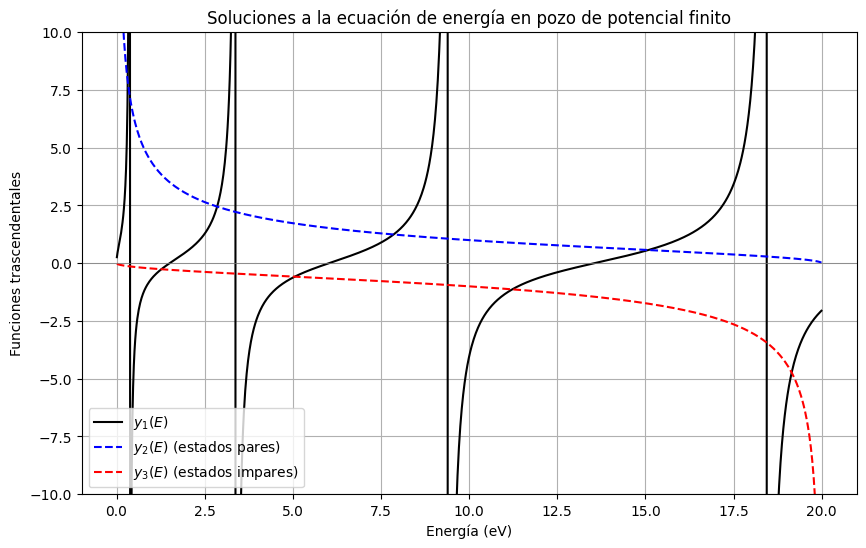

In [31]:
import numpy as np
import matplotlib.pyplot as plt


hbar = 1.055e-34
m = 9.11e-31
w = 1e-9
V_eV = 20
e = 1.602e-19
V = V_eV * e

E_eV = np.linspace(0.01, 19.99, 1000)
E = E_eV * e

k = np.sqrt(2 * m * E) / hbar
y1 = np.tan(k * w / 2)
with np.errstate(divide='ignore', invalid='ignore'):
    y2 = np.sqrt((V - E) / E)
    y3 = -np.sqrt(E / (V - E))

plt.figure(figsize=(10, 6))
plt.plot(E_eV, y1, label=r'$y_1(E)$', color='black')
plt.plot(E_eV, y2, label=r'$y_2(E)$ (estados pares)', color='blue', linestyle='--')
plt.plot(E_eV, y3, label=r'$y_3(E)$ (estados impares)', color='red', linestyle='--')

plt.ylim(-10, 10)
plt.xlabel("Energía (eV)")
plt.ylabel("Funciones trascendentales")
plt.title("Soluciones a la ecuación de energía en pozo de potencial finito")
plt.axhline(0, color='gray', linewidth=0.5)
plt.legend()
plt.grid(True)
plt.show()


In [51]:
import numpy as np

hbarra = 1.0545718e-34
masa = 9.11e-31
V_eV = 20.0
ancho = 1e-9

def y1(E_eV):
    E_J = E_eV * 1.60218e-19
    arg = ancho * np.sqrt(2 * masa * E_J) / (2 * hbarra)
    return np.tan(arg)

def y2(E_eV):
    return np.sqrt((V_eV - E_eV) / E_eV)

def y3(E_eV):
    return -np.sqrt(E_eV / (V_eV - E_eV))

def f_par(E):
    return y1(E) - y2(E)

def f_impar(E):
    return y1(E) - y3(E)

def biseccion(f, a, b, tol=1e-3):
    fa, fb = f(a), f(b)
    if np.isnan(fa) or np.isnan(fb) or fa*fb > 0:
        return None
    while (b - a)/2 > tol:
        c = (a + b)/2
        fc = f(c)
        if np.isnan(fc):
            return None
        if fa*fc < 0:
            b, fb = c, fc
        else:
            a, fa = c, fc
    return (a + b)/2

def encontrar_niveles(n_niveles=6, pasos=5000):
    E_vals = np.linspace(1e-3, V_eV - 1e-3, pasos)
    niveles = []

    es_par = True
    i = 0
    while len(niveles) < n_niveles and i < pasos-1:
        E1, E2 = E_vals[i], E_vals[i+1]
        f1 = (f_par if es_par else f_impar)(E1)
        f2 = (f_par if es_par else f_impar)(E2)
        if not np.isnan(f1) and not np.isnan(f2) and f1*f2 < 0:
            raiz = biseccion(f_par if es_par else f_impar, E1, E2)
            if raiz is not None:
                niveles.append((len(niveles), 'par' if es_par else 'impar', raiz))
                es_par = not es_par
        i += 1
    return niveles

niveles = encontrar_niveles()
print("Primeros seis niveles de energía (en eV):")
for idx, tipo, E in niveles:
    print(f"Estado {idx} ({tipo}): {E:.3f} eV")


Primeros seis niveles de energía (en eV):
Estado 0 (par): 0.318 eV
Estado 1 (impar): 0.376 eV
Estado 2 (par): 2.851 eV
Estado 3 (impar): 3.384 eV
Estado 4 (par): 7.849 eV
Estado 5 (impar): 9.400 eV


7-

In [ ]:
import numpy as np
G=6.674e-11
M=5.974e24
m=7.348e22
R=3.844e8
w=2.662e-6

def secante(f,r0,r1, tol=1e-4,max_iter=100):
  aproximaciones=[]
  for _ in range(max_iter):
    f_r0=f(r0)
    f_r1=f(r1)
    if f_r1-f_r0 == 0:
      raise ValueError('Denominador 0')
    r2=r1-f_r1*(r1-r0)/(f_r1-f_r0)
    aproximaciones.append(r2)
    if abs(r2 - r1) < tol:
      return r2, aproximaciones
    aproximaciones.append(r2)
    r0=r1
    r1=r2
  raise RuntimeError(' No fueron suficientes iteraciones')
f= lambda r:  G*M/r**2 - G*m/(R - r)**2 - w**2 * r
raiz,aproximaciones=secante(f,3.26e7,3.26e9)
print(f'{raiz:.2e}')


3.26e+08
